<a href="https://colab.research.google.com/github/JakeOh/202504_itwill_oracle88/blob/main/python20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 패키지 import

In [1]:
import numpy as np  # numpy 패키지를 np 별칭으로 사용
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib 패키지의 pyplot 모듈을 plt 별칭으로 사용
import seaborn as sns

# 데이터셋 준비

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# `matplotlib.pyplot` 모듈을 사용한 데이터 시각화

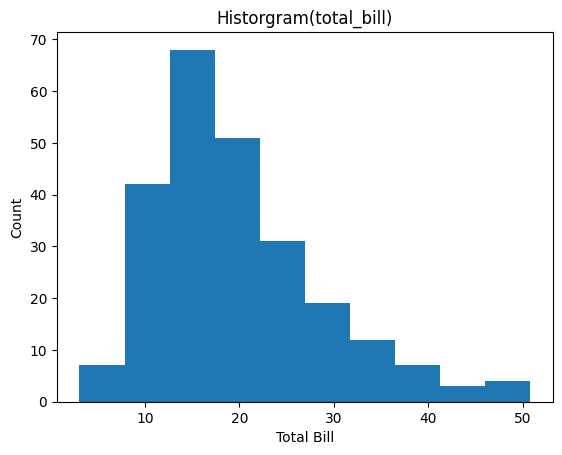

In [5]:
# 1. Figure 객체 생성
fig = plt.figure()

# 2. Figure 객체에 Subplot(들)을 추가
# Figure.add_subplot(nrows, ncols, index)
# - nrows: subplot의 행(row)의 개수
# - ncols: subplot의 열(column)의 개수
# - index: subplot의 인덱스(위치)
# axis = fig.add_subplot(1, 1, 1)

# Figure.add_subpolt(pos)
# - pos: '행/열/인덱스' 순서로 만들어진 3자리 숫자
axis = fig.add_subplot(111)

# 3. suplot에 그래프를 그림.
axis.hist(x=tips.total_bill)

# 4. 그래프의 옵션들을 설정
axis.set_title('Historgram(total_bill)')
axis.set_xlabel('Total Bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기
plt.show()

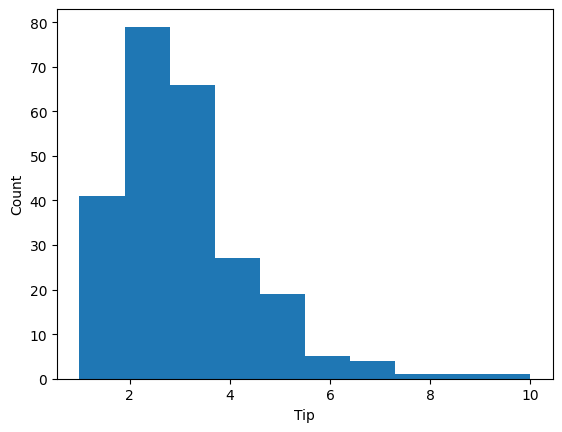

In [6]:
# 1. Figure 객체 생성 + Subplot 추가
fig, axis = plt.subplots()  # subplots의 파라미터 nrows, ncols의 기본값 1

# 2. Subplot에 그래프 그림
axis.hist(x=tips.tip)

# 3. 그래프 옵션
axis.set_xlabel('Tip')
axis.set_ylabel('Count')

# 4. 그래프 보여주기
plt.show()

1개의 Figure에 1개의 Subplot만 있는 경우에는 pyplot 모듈의 top-level 그래프 함수를 직접 이용할 수도 있음.

top-level 그래프 함수를 사용하면 Figure 생성과 Subplot 추가 코드를 작성할 필요가 없음.

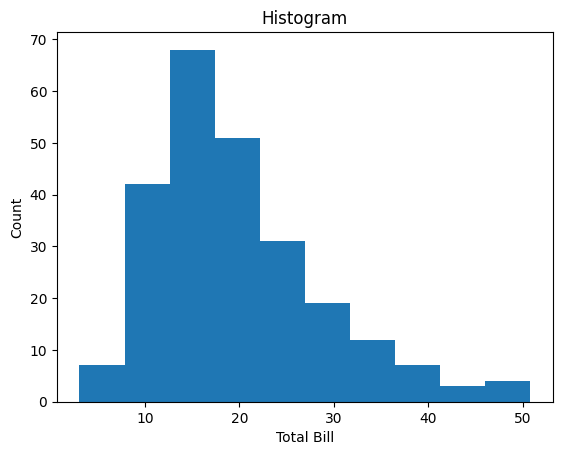

In [7]:
# pyplot 함수 호출 -> Figure 객체 생성, Subplot(Axex) 객체 생성, 그래프 작성
plt.hist(x=tips.total_bill)

# 옵션 설정 - pyplot 모듈의 함수 사용
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.title('Histogram')

# 그래프 보여주기
plt.show()

*   1개의 Figure에 2개 Subplot을 위/아래로 배치(nrows 설정).
*   위쪽 Axes에는 total_bill 히스토그램을 작성.
*   아래쪽 Axex에는 산점도 그래프(x축: total_bill, y축: tip)

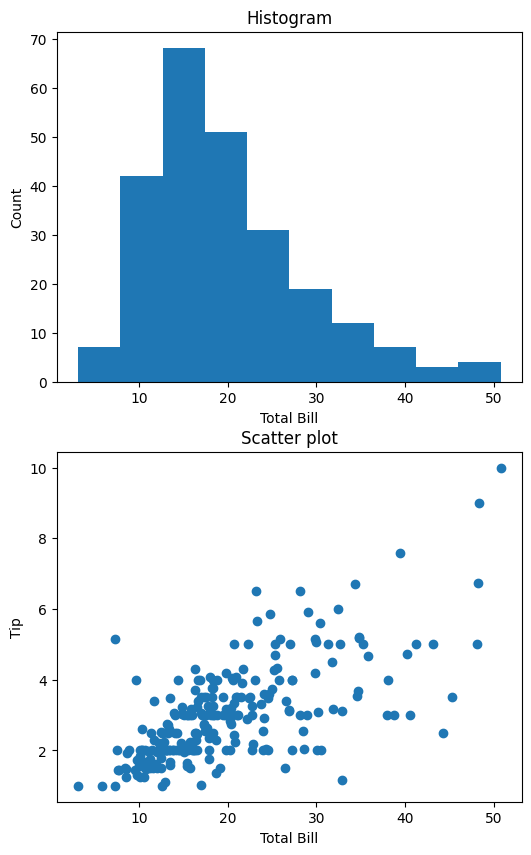

In [8]:
# 1. Figure 객체를 생성
fig = plt.figure(figsize=(6, 10))

# 2. Figure 객체에 Subplot들을 추가
axis1 = fig.add_subplot(2, 1, 1)  # 위쪽 Axes, add_subplot(211)와 동일.
axis2 = fig.add_subplot(212)  # 아래쪽 Axes, add_subplot(2, 1, 2)와 동일.

# 3. 그래프 작성
axis1.hist(x=tips.total_bill)
axis2.scatter(x=tips.total_bill, y=tips.tip)

# 4. 옵션
axis1.set_title('Histogram')
axis1.set_xlabel('Total Bill')
axis1.set_ylabel('Count')

axis2.set_title('Scatter plot')
axis2.set_xlabel('Total Bill')
axis2.set_ylabel('Tip')

# 5. 그래프 보여주기
plt.show()

*   1개의 Figure에 2개 Subplot을 좌우로 배치(ncols 설정).
*   왼쪽 Axes에는 total_bill 히스토그램을 작성.
*   오른쪽 Axex에는 산점도 그래프(x축: total_bill, y축: tip)

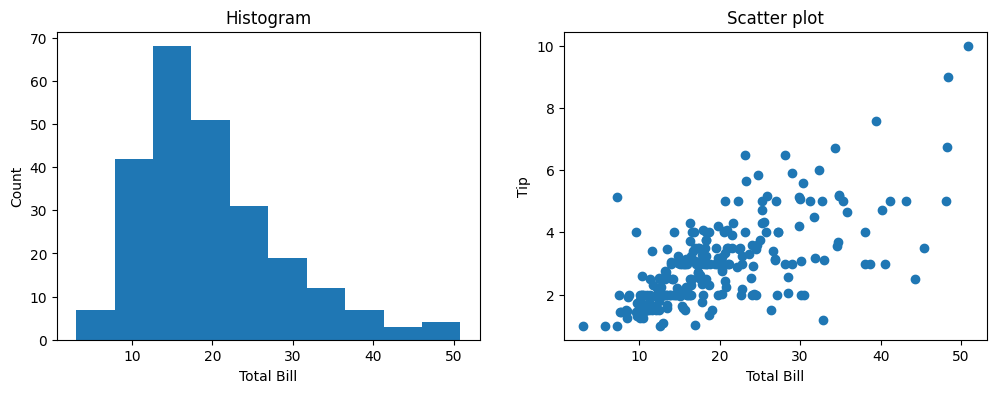

In [9]:
# 1. Figure 생성 + Subplot 추가
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
# fig.set_figwidth(12)

# 2. 왼쪽 축(Axis)에 그래프 그리기 & 옵션
axes[0].hist(x=tips.total_bill)
axes[0].set_title('Histogram')
axes[0].set_xlabel('Total Bill')
axes[0].set_ylabel('Count')

# 3. 오른쪽 축(Axis)에 그래프 그리기 & 옵션
axes[1].scatter(x=tips.total_bill, y=tips.tip)
axes[1].set_title('Scatter plot')
axes[1].set_xlabel('Total Bill')
axes[1].set_ylabel('Tip')

# 4. 그래프 보여주기
plt.show()

# Box Plot(상자 그림)

숫자 타입(int, float) 변수의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값)을 시각화

In [10]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


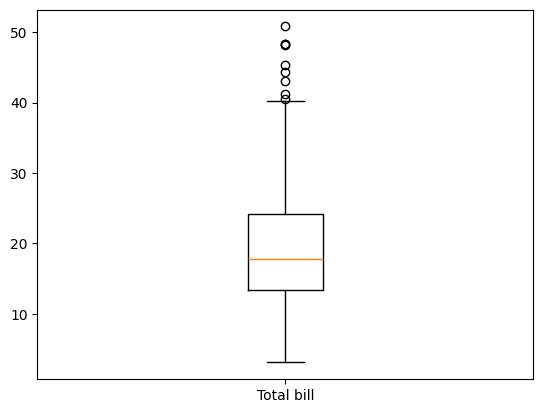

In [11]:
# total_bill box plot
plt.boxplot(x=tips.total_bill, tick_labels=['Total bill'])
plt.show()

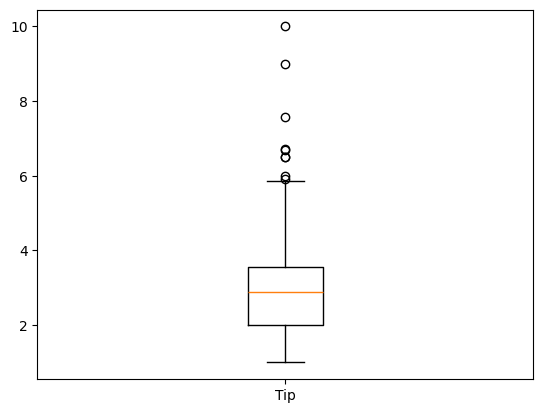

In [12]:
# tip box plot
plt.boxplot(x=tips.tip, tick_labels=['Tip'])
plt.show()

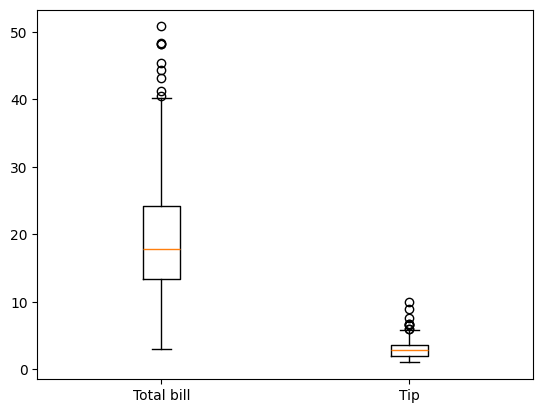

In [13]:
# total_bill과 tip의 box plot을 함께 시각화
plt.boxplot(x=[tips.total_bill, tips.tip], tick_labels=['Total bill', 'Tip'])
plt.show()

1개의 figure를 2개 subplot으로 나누고(좌/우 방향), 각각의 subplot에 total_bill, tip의 box plot을 그리세요.

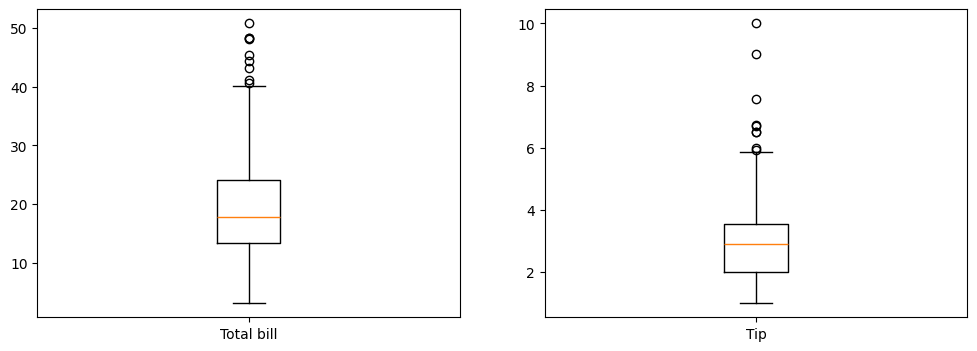

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].boxplot(x=tips.total_bill, tick_labels=['Total bill'])
axes[1].boxplot(x=tips.tip, tick_labels=['Tip'])
plt.show()

## 성별 팁의 box plot

*   남성 tip의 기술 통계량
*   여성 tip의 기술 통계량
*   성별 tip의 box plot

In [15]:
male_tip = tips[tips.sex == 'Male'].tip
male_tip.describe()

,tip
count,157.000000
mean,3.089618
std,1.489102
min,1.000000
25%,2.000000
50%,3.000000
75%,3.760000
max,10.000000


In [16]:
female_tip = tips[tips.sex == 'Female'].tip
female_tip.describe()

,tip
count,87.000000
mean,2.833448
std,1.159495
min,1.000000
25%,2.000000
50%,2.750000
75%,3.500000
max,6.500000


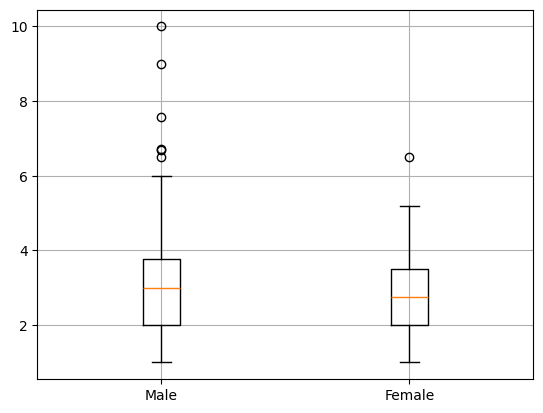

In [17]:
plt.boxplot(x=[male_tip, female_tip], tick_labels=['Male', 'Female'])
plt.grid()
plt.show()

## 시간별(Lunch, Dinner) 팁의 box plot

In [18]:
lunch_tip = tips[tips.time == 'Lunch'].tip
lunch_tip.describe()

,tip
count,68.000000
mean,2.728088
std,1.205345
min,1.250000
25%,2.000000
50%,2.250000
75%,3.287500
max,6.700000


In [19]:
dinner_tip = tips[tips.time == 'Dinner'].tip
dinner_tip.describe()

,tip
count,176.000000
mean,3.102670
std,1.436243
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,10.000000


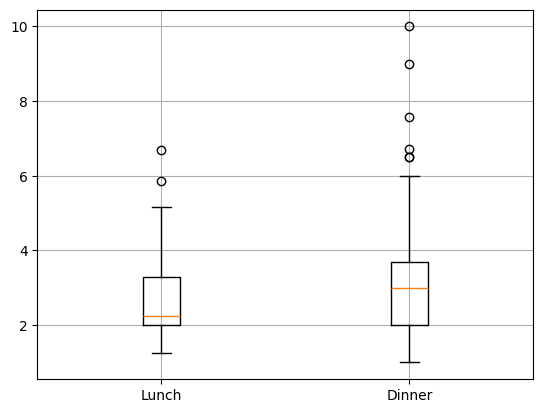

In [20]:
plt.boxplot(x=[lunch_tip, dinner_tip], tick_labels=['Lunch', 'Dinner'])
plt.grid()
plt.show()

## 요일별(Thur, Fri, Sat, Sun) 팁의 box plot

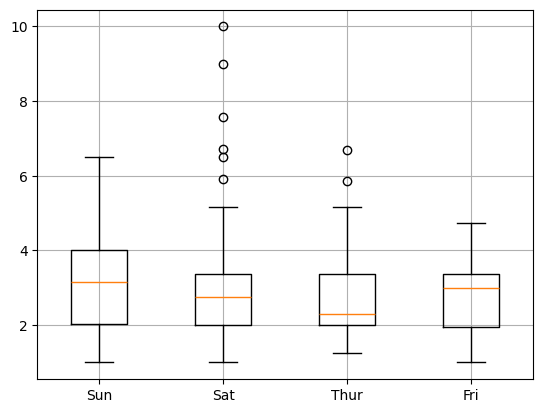

In [21]:
data = []  # box plot을 그리기 위한 데이터. boxplot 함수의 x 파라미터에 전달할 아규먼트
days = tips.day.unique()
for d in days:
    day_tip = tips[tips.day == d].tip
    data.append(day_tip)

plt.boxplot(x=data, tick_labels=days)
plt.grid()
plt.show()

# Histogram(히스토그램)

연속형 자료(숫자 타입 자료)를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 표현한 그래프.

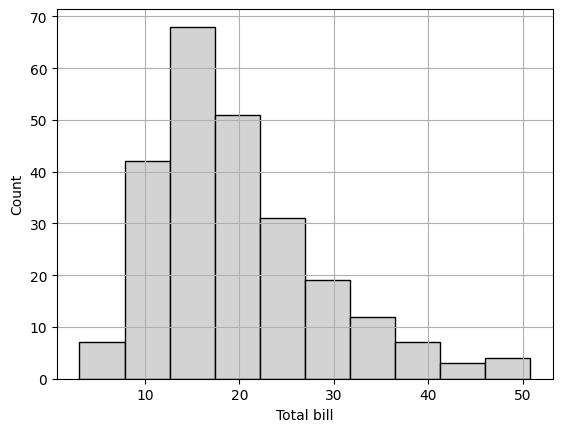

In [22]:
plt.hist(x=tips.total_bill,  # x=히스토그램을 그리기 위한 연속형 자료
         bins=10,            # bins=막대 개수 또는 나누는 구간
         edgecolor='black',  # edgecolor=막대의 테두리 색깔
         color='lightgray')  # color=막대 내부를 채우는 색깔
plt.xlabel('Total bill')
plt.ylabel('Count')
plt.grid()
plt.show()

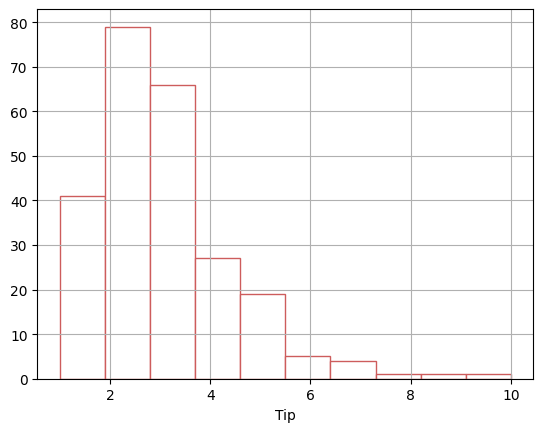

In [23]:
# tip 히스토그램
plt.hist(x=tips.tip, edgecolor='IndianRed', color='white')
plt.grid()
plt.xlabel('Tip')
plt.show()

# Bar Plot(막대 그래프)

카테고리(범주) 타입 변수의 빈도수를 막대로 표현한 그래프.

## 세로 막대 그래프(vertical bar plot)

In [24]:
# 성별 빈도수(frequency)
gender_counts = tips.sex.value_counts()
gender_counts

,count
sex,
Male,157
Female,87


In [25]:
gender_counts.index  # Series.index 속성

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

In [26]:
gender_counts.values  # Series.value 속성

array([157,  87])

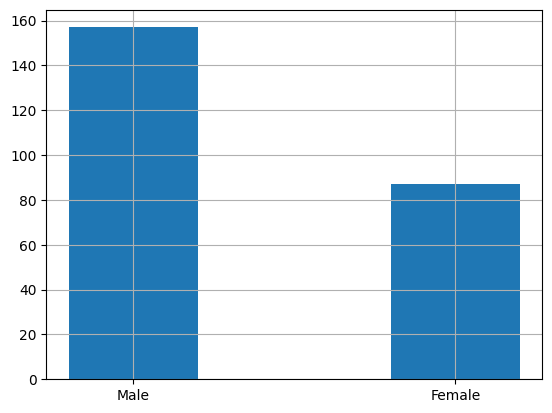

In [27]:
plt.bar(x=gender_counts.index,        # x=카테고리 타입
        height=gender_counts.values,  # height=막대 세로 길이. 빈도수.
        width=0.4)                    # width=막대 가로 길이. 기본값은 0.8
plt.grid()
plt.show()

## 가로 막대 그래프(horizontal bar plot)

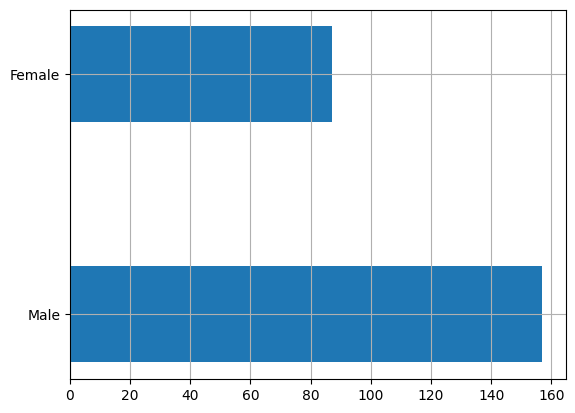

In [28]:
plt.barh(y=gender_counts.index,       # y=카테고리(범주)
         width=gender_counts.values,  # width=막대 가로 길이. 빈도수
         height=0.4)                  # height=막대 세로 길이. 기본값은 0.8
plt.grid()
plt.show()

size(한 테이블의 손님수)의 빈도수와 가로/세로 막대 그래프를 작성하세요.

In [29]:
size_counts = tips['size'].value_counts()
size_counts

,count
size,
2,156
3,38
4,37
5,5
1,4
6,4


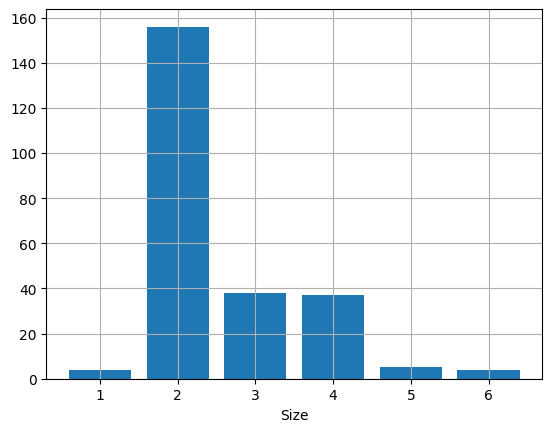

In [30]:
plt.bar(x=size_counts.index, height=size_counts.values)
plt.xlabel('Size')
plt.grid()
plt.show()

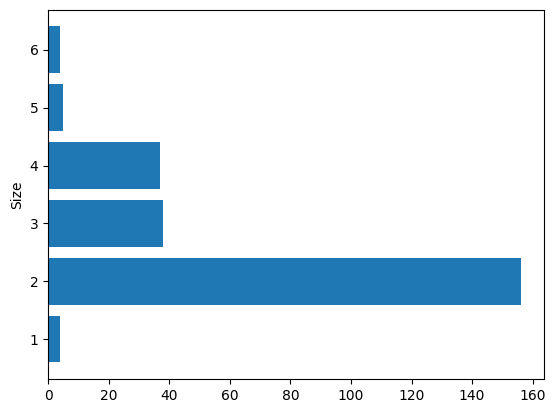

In [31]:
plt.barh(y=size_counts.index, width=size_counts.values)
plt.ylabel('Size')
plt.show()

*   4개의 subplot을 2개 행과 2개 열로 추가.
*   성별 빈도수, 흡연 여부 빈도수, 요일 빈도수, 시간 빈도수 막대 그래프 작성

In [32]:
gender_counts = tips.sex.value_counts()  # 성별 빈도수
smoker_counts = tips.smoker.value_counts()  # 흡연 여부 빈도수
day_counts = tips.day.value_counts()  # 요일 빈도수
time_counts = tips.time.value_counts()  # 시간(점심/저녁) 빈도수

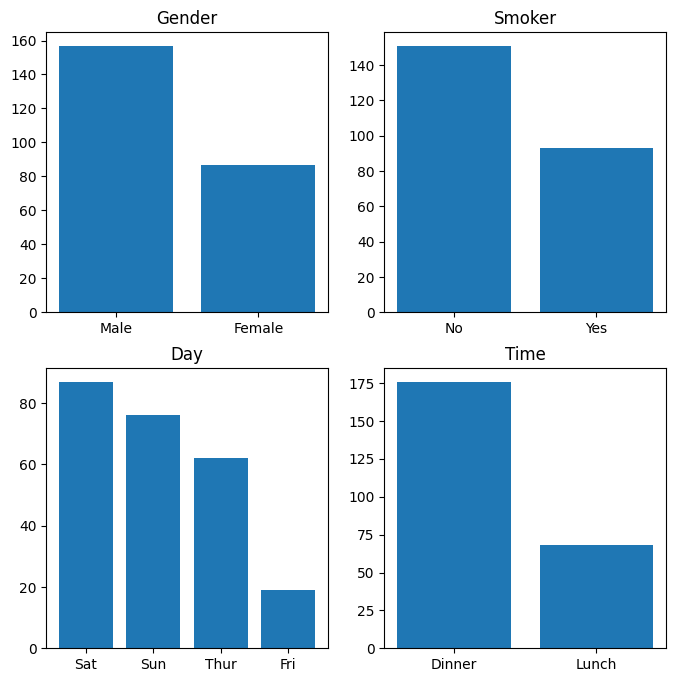

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

axes[0, 0].bar(x=gender_counts.index, height=gender_counts.values)
axes[0, 0].set_title('Gender')
axes[0, 1].bar(x=smoker_counts.index, height=smoker_counts.values)
axes[0, 1].set_title('Smoker')
axes[1, 0].bar(x=day_counts.index, height=day_counts.values)
axes[1, 0].set_title('Day')
axes[1, 1].bar(x=time_counts.index, height=time_counts.values)
axes[1, 1].set_title('Time')

plt.show()

## numpy.ndarray 클래스 타입 vs Python list 클래스 타입

In [34]:
number_list1 = [1, 2, 3, -1, -2, -3]
print(type(number_list1))
print(number_list1)  #> list는 아이템과 아이템을 comma(,)로 구분해서 출력

<class 'list'>
[1, 2, 3, -1, -2, -3]


In [35]:
number_array1 = np.array([1, 2, 3, -1, -2, -3])
print(type(number_array1))
print(number_array1)  #> ndarray는 아이템과 아이템을 공백으로 구분해서 출력

<class 'numpy.ndarray'>
[ 1  2  3 -1 -2 -3]


list는 `list + list` 연산과 `list * int` 연산만 제공

In [36]:
number_list2 = [10, 20, 30]
print(number_list1 + number_list2)
print(number_list2 * 3)

[1, 2, 3, -1, -2, -3, 10, 20, 30]
[10, 20, 30, 10, 20, 30, 10, 20, 30]


numpy.ndarray는 모든 산술 연산이 가능. 같은 위치(인덱스)의 원소들끼리(element-wise) 산술 연산을 수행.

In [37]:
number_array2 = np.ones(shape=(6), dtype=np.int64)  # np.array([1, 1, 1, 1, 1, 1])
print(number_array2)
print(number_array1 + number_array2)

[1 1 1 1 1 1]
[ 2  3  4  0 -1 -2]


In [38]:
print(number_array1 * 3)

[ 3  6  9 -3 -6 -9]


2차원 list vs 2차원 배열 인덱스 사용 방법

In [39]:
# Python의 list 객체
list_2d = [
    [1, 2, 3],
    [4, 5, 6]
]

print(list_2d)
print(list_2d[0])
print(list_2d[0][0])  # 2차원 list: list[i][j]

[[1, 2, 3], [4, 5, 6]]
[1, 2, 3]
1


In [40]:
# numpy.ndarray 객체
array_2d = np.array(list_2d)

print(array_2d)
print(array_2d[0])
print(array_2d[0][0])  # 2차원 배열(ndarray): array[i][j]
print(array_2d[0, 0])  # array[i, j]

[[1 2 3]
 [4 5 6]]
[1 2 3]
1
1


## 반복문을 사용한 subplot

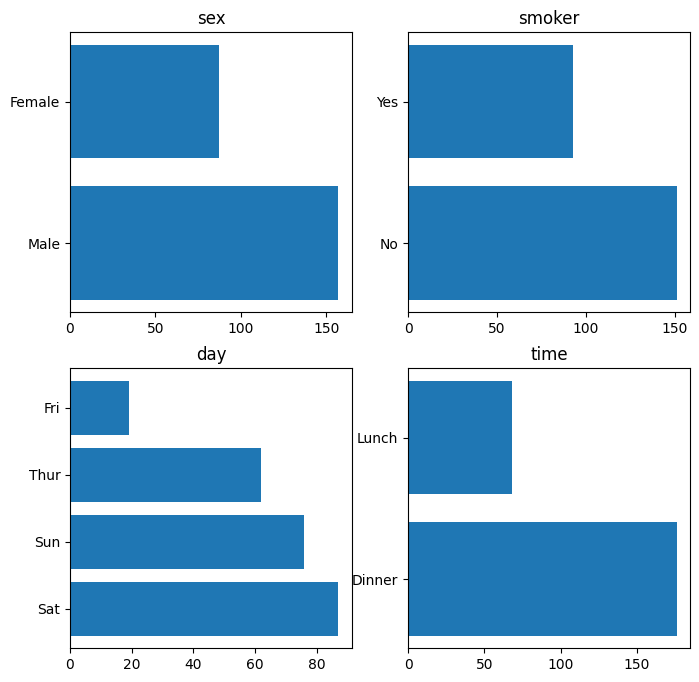

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
# print(type(axes))  #> numpy.ndarray

titles = np.array([['sex', 'smoker'], ['day', 'time']])
# print(titles)
for i, row in enumerate(titles):
    for j, x in enumerate(row):
        frequency = tips[x].value_counts()
        axes[i, j].barh(y=frequency.index, width=frequency)
        axes[i, j].set_title(x)

plt.show()

# Scatter Plot(산점도)

*   두 변수(컬럼) 간의 상관 관계를 알고 싶을 때 사용.
*   `y ~ x` 관계 시각화.
    *   y: 관심 변수. 종속 변수.
    *   x: 독립 변수.

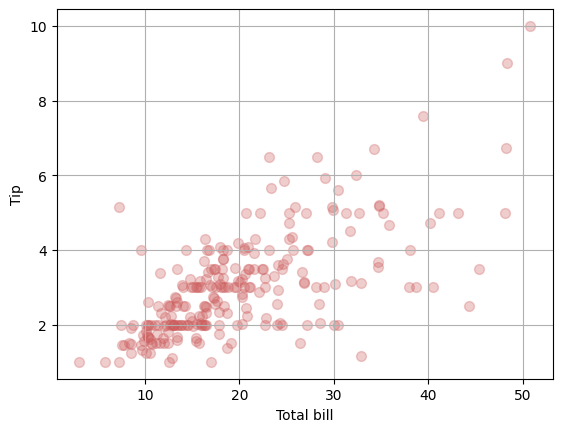

In [42]:
# tip ~ total_bill 관계
plt.scatter(x=tips.total_bill, y=tips.tip,  # x축, y축에 사용할 변수(컬럼)
            alpha=0.3,                      # alpha: 투명도(0: 투명, 1: 불투명)
            s=50,                           # s: size. 마커의 크기.
            c='IndianRed',                  # c: color. 마커의 색깔
            marker='o'                      # marker: 마커의 모양(o, s, v, ^, *, +, ...)
            )
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

*   tip ~ total_bill 상관 관계
*   남성인 경우에는 마커의 색깔을 'DodgerBlue'로, 여성인 경우에는 'IndianRed'로 사용.

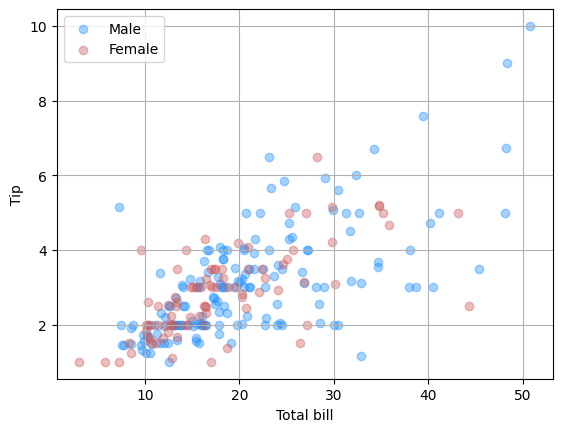

In [43]:
male_df = tips[tips.sex == 'Male']
female_df = tips[tips.sex == 'Female']

plt.scatter(x=male_df.total_bill, y=male_df.tip, c='DodgerBlue', alpha=0.4, label='Male')
plt.scatter(x=female_df.total_bill, y=female_df.tip, c='IndianRed', alpha=0.4, label='Female')

plt.legend()  # legend(): scatter 함수의 label 파라미터 값을 범례로 표시.
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()

plt.show()

# Line Plot(선 그래프)

주로 시계열 데이터(주식, 환율, 미세먼지 농도, ...)를 시각화.

In [44]:
# 선 그래프를 그리기 위한 가상 데이터
np.random.seed(1)  # 실행할 때마다 항상 같은 난수들이 만들어지도록 하기 위해서.
df = pd.DataFrame(data={
    'day': np.arange(1, 11),     # np.arange(start, stop, step): [start, stop) 범위의 step만큼씩 변하는 정수들의 배열(ndarray)
    'price': np.random.rand(10)  # np.random.rand(d): [0, 1) 범위의 실수 난수 d개를 갖는 배열(ndarray)
})
df

,day,price
0,1,0.417022
1,2,0.720324
2,3,0.000114
3,4,0.302333
4,5,0.146756
5,6,0.092339
6,7,0.186260
7,8,0.345561
8,9,0.396767
9,10,0.538817


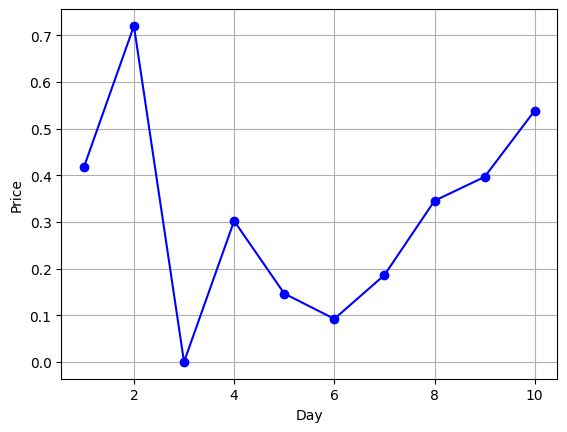

In [45]:
# x축에 day, y축에 price로 하는 선 그래프
plt.plot(df.day, df.price, 'bo-')  # plt.plot(x, y, fmt)
# plot의 세번째 아규먼트 fmt(format):
# - color(색깔), marker(마커 모양), linestyle(선 스타일) 정보를 문자열로 작성.
# - color: b(blue), r(red), g(green), k(black), ...
# - marker: o, s, ^, v, *, ...
# - linestyle: -(직선), --(dashed line), :(dotted line), ...

plt.grid()
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

# 연습문제

## Ex 1.
tips 데이터셋에서 tip ~ total_bill의 산점도를 그리세요.
*   성별(Male/Female)에 따라서 마커의 색깔을 다르게 표현
*   흡연 여부에 따라서 마커의 모양을 다르게 표현
*   범례를 표시

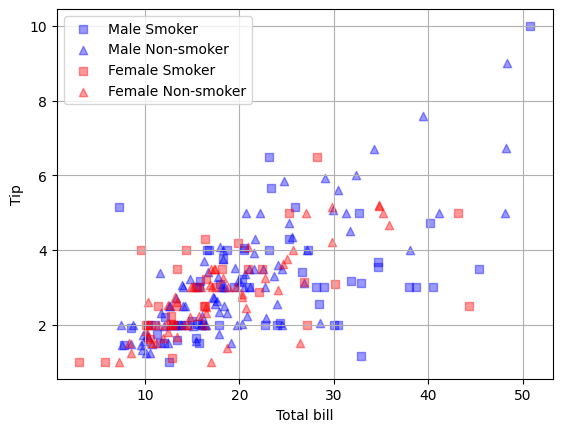

In [58]:
male_smoker = tips[(tips.sex == 'Male') & (tips.smoker == 'Yes')]  # 남성 흡연자
male_nonsmoker = tips[(tips.sex == 'Male') & (tips.smoker == 'No')]  # 남성 비흡연자
female_smoker = tips[(tips.sex == 'Female') & (tips.smoker == 'Yes')]  # 여성 흡연자
female_nonsmoker = tips[(tips.sex == 'Female') & (tips.smoker == 'No')]  # 여성 비흡연자

plt.scatter(x=male_smoker.total_bill, y=male_smoker.tip, alpha=0.4,
            c='blue', marker='s', label='Male Smoker')
plt.scatter(x=male_nonsmoker.total_bill, y=male_nonsmoker.tip, alpha=0.4,
            c='blue', marker='^', label='Male Non-smoker')
plt.scatter(x=female_smoker.total_bill, y=female_smoker.tip, alpha=0.4,
            c='red', marker='s', label='Female Smoker')
plt.scatter(x=female_nonsmoker.total_bill, y=female_nonsmoker.tip, alpha=0.4,
            c='red', marker='^', label='Female Non-smoker')

plt.legend()
plt.grid()
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

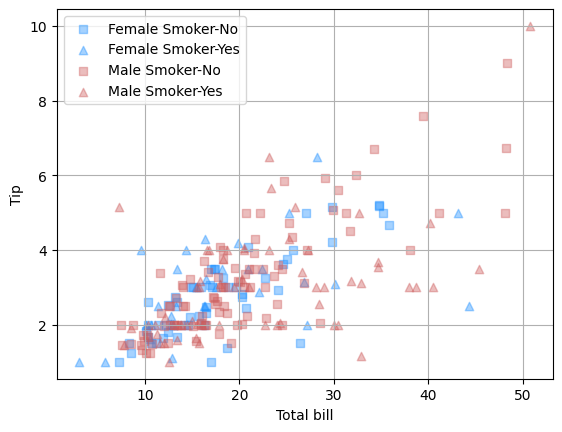

In [66]:
gender = tips.sex.unique()
smoker = tips.smoker.unique()
colors = ['DodgerBlue', 'IndianRed']
markers = ['s', '^']

for g, c in zip(gender, colors):
    for s, m in zip(smoker, markers):
        df = tips[(tips.sex == g) & (tips.smoker == s)]
        plt.scatter(x=df.total_bill, y=df.tip, alpha=0.4,
                    c=c, marker=m, label=f'{g} Smoker-{s}')

plt.legend()
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

## Ex 2.
아래의 데이터 프레임에서 apple, samsung, hynix 데이터를 선 그래프로 그리세요.
*   선 그래프 3개가 함께 표현
*   각각의 데이터는 다른 색깔, 마커, 선 스타일로 표현
*   범례 표시

In [68]:
np.random.seed(1)
df = pd.DataFrame({'apple': np.random.rand(10),
                   'samsung': np.random.rand(10),
                   'hynix': np.random.rand(10)})
df

,apple,samsung,hynix
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


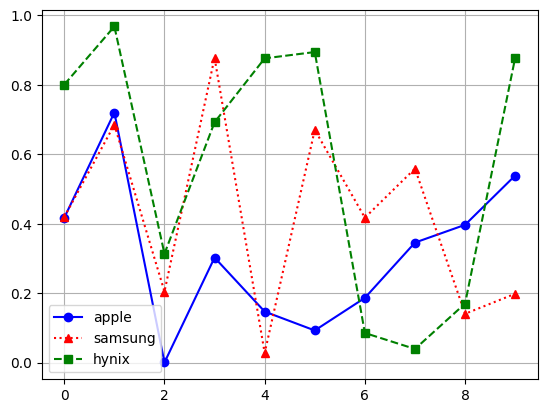

In [77]:
plt.plot(df.apple, 'bo-', label='apple')
plt.plot(df.samsung, 'r^:', label='samsung')
plt.plot(df.hynix, 'gs--', label='hynix')

plt.legend()
plt.grid()
plt.show()

## Ex 3.
iris 데이터셋 시각화.
*   seaborn 패키지의 iris 예제 데이터셋 로드
*   DataFrame 확인(`head`, `info`, `describe`, `value_counts` 등)
*   petal_width ~ petal_length 산점도
    *   species 별로 마커의 색깔을 다르게 표현